# Feature Transformation

1. It is a technique by which we can boost our model performance. Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis.

2. It is also known as Feature Engineering, which is creating new features from existing features that may help in improving the model performance.

3. It refers to the family of algorithms that create new features using the existing features. These new features may not have the same interpretation as the original features, but they may have more explanatory power in a different space rather than in the original space.

4. This can also be used for Feature Reduction. It can be done in many ways, by linear combinations of original features or by using non-linear functions.

5. It helps machine learning algorithms to converge faster.

6. Some Machine Learning models, like Linear and Logistic regression, assume that the variables follow a normal distribution. More likely, variables in real datasets will follow a skewed distribution.

7. By applying some transformations to these skewed variables, we can map this skewed distribution to a normal distribution so, this can increase the performance of our models.


# Standardization

The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively. The equation is shown below:

 
Standardized value = X – μ / σ
 
This technique is to re-scale features value with the distribution value between 0 and 1 is useful for the optimization algorithms, such as gradient descent, that are used within machine learning algorithms that weight inputs (e.g., regression and neural networks). Rescaling is also used for algorithms that use distance measurements, for example, K-Nearest-Neighbours (KNN).

In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('titanic/train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [54]:
med=df.Age.median()
med

28.0

In [55]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [56]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [41]:
X= df.iloc[:,1:]
y= df[['Survived']]

In [42]:
X

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [45]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [19]:
X_test_scaled=scalar.transform(X_test)
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
model.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

# Max-Min Normalization

Another common approach is the so-called Max-Min Normalization (Min-Max scaling). This technique is to re-scales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1. The general equation is shown below:

x ′ = ( x − x m i n ) / ( x m a x − x m i n )


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scalar=MinMaxScaler()
df_mm=scalar.fit_transform(X_train)

In [27]:
df_mm=pd.DataFrame(df_mm)
df_mm.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


<IPython.core.display.Javascript object>

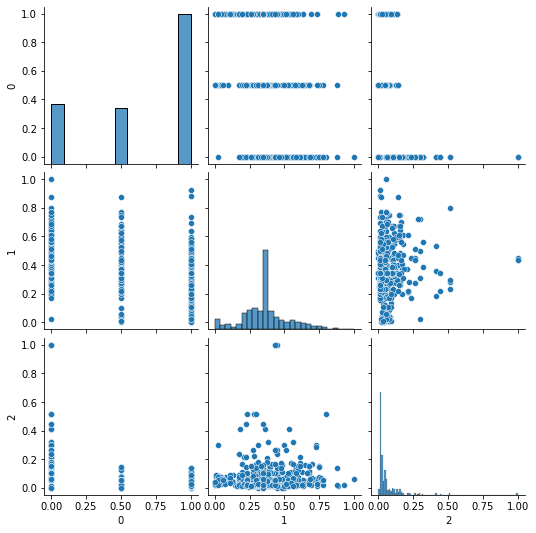

In [28]:
sns.pairplot(df_mm);

# Robust Scaler
If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

1. removes the median from the data
2. scales the data by the InterQuartile Range(IQR)

In [30]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [31]:
from sklearn.preprocessing import RobustScaler

In [36]:
rs=RobustScaler()
df_rs=rs.fit_transform(X_train)
df_rs=pd.DataFrame(df_rs)
df_rs

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630
...,...,...,...
591,0.0,-0.538462,-0.291400
592,-2.0,0.000000,0.708600
593,0.0,1.000000,-0.014814
594,-2.0,-1.076923,4.520163


In [37]:
rs.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

<IPython.core.display.Javascript object>

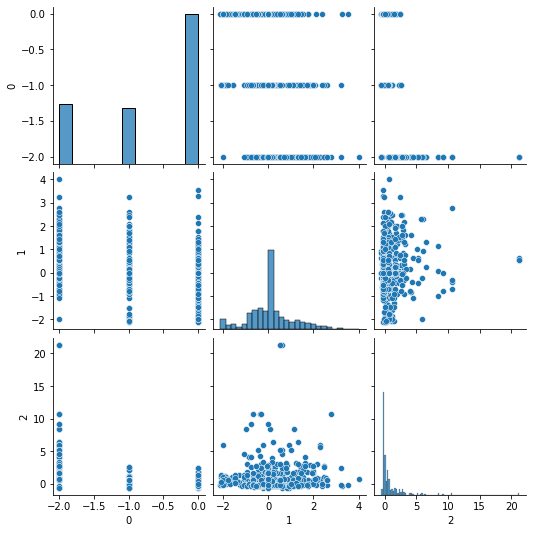

In [39]:
sns.pairplot(df_rs);

<IPython.core.display.Javascript object>

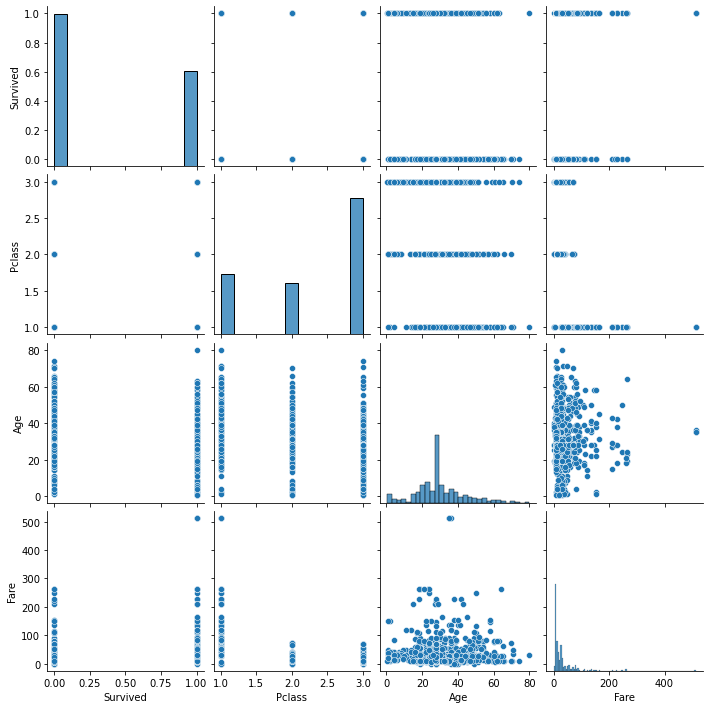

In [41]:
sns.pairplot(df);

# Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed which have direct impact on 
Accuracy and Performance.
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

### LOG TRANSFORMATION:

– Generally, these transformations make our data close to a normal distribution but are not able to exactly abide by a normal distribution.

–  This transformation is not applied to those features which have negative values.

– This transformation is mostly applied to right-skewed data.

– Convert data from addictive Scale to multiplicative scale i,e, linearly distributed data.

In [48]:
df=pd.read_csv('titanic/train.csv',usecols=['Age','Fare','Pclass','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [49]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [50]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [57]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [64]:
def plot_data(data,variable):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[variable],dist='norm',plot=pylab)

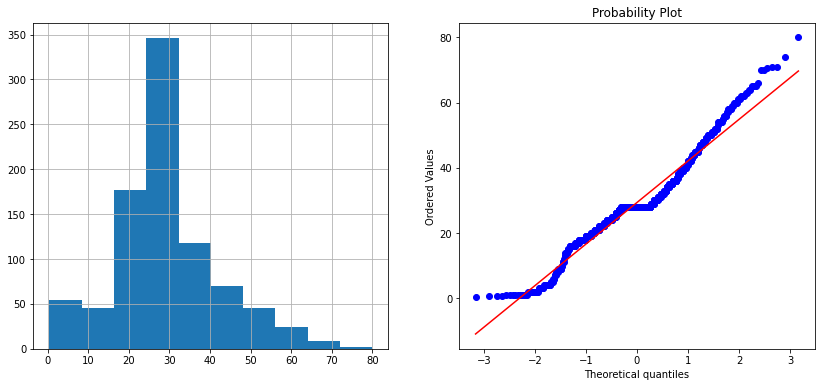

In [65]:
plot_data(df,'Age')

<IPython.core.display.Javascript object>

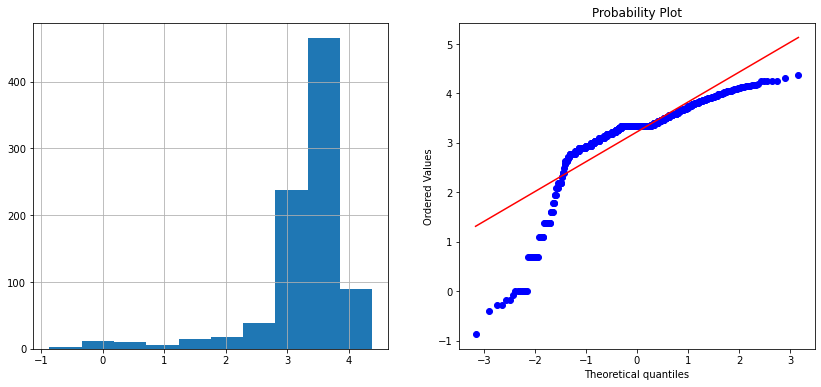

In [67]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### RECIPROCAL TRANSFORMATION

– This transformation is not defined for zero.

– It is a powerful transformation with a radical effect.

– This transformation reverses the order among values of the same sign, so large values become smaller and vice-versa.

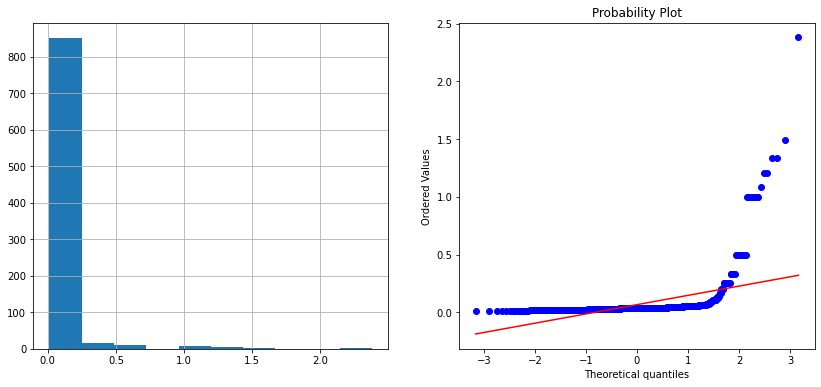

In [68]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

### SQUARE ROOT TRANSFORMATION:

– This transformation is defined only for positive numbers.

– This transformation is weaker than Log Transformation.

– This can be used for reducing the skewness of right-skewed data.

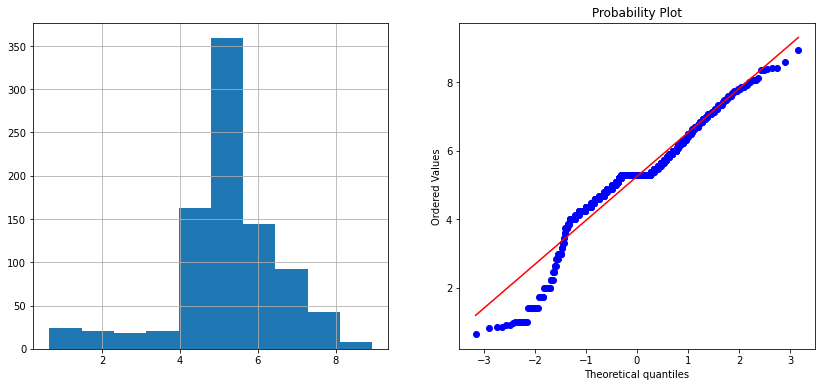

In [69]:
df['Age_sq_root']=df.Age**(1/2)
plot_data(df,'Age_sq_root')

# Exponential Transformation

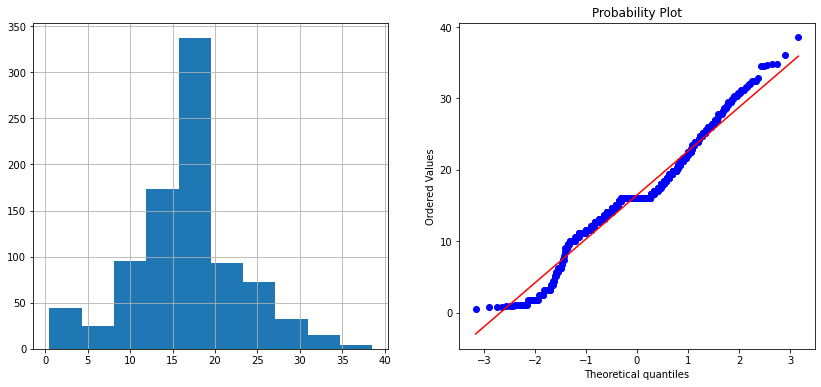

In [70]:
df['Age_exp']=df['Age']**(1/1.2)
plot_data(df,'Age_exp')

# BoxCox Transformation

In [72]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])
parameters

0.7964531473656952

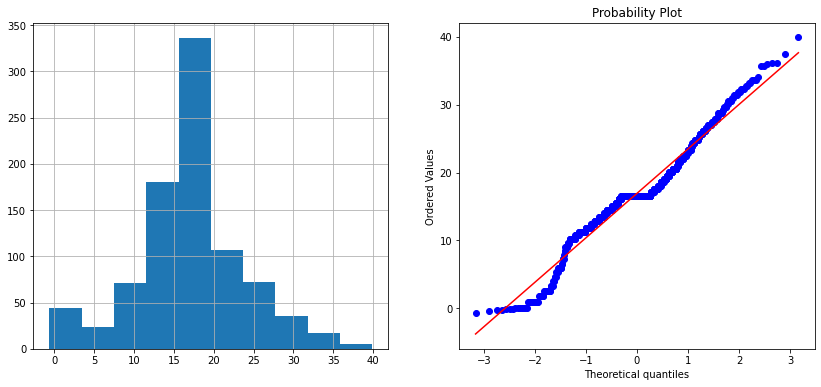

In [73]:
plot_data(df,'Age_boxcox')

# Fare

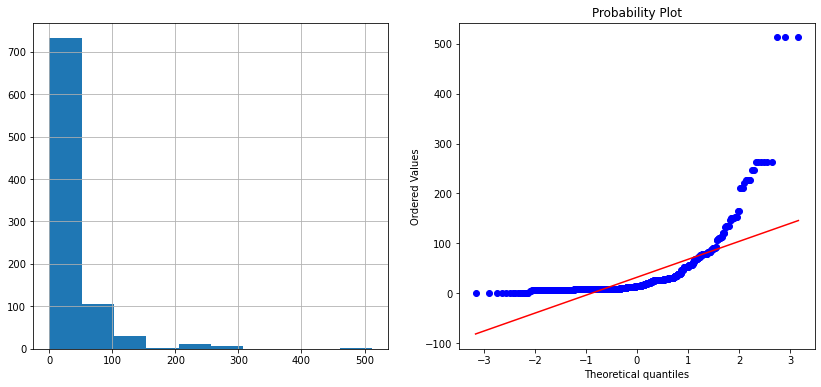

In [74]:
plot_data(df,'Fare')

<IPython.core.display.Javascript object>

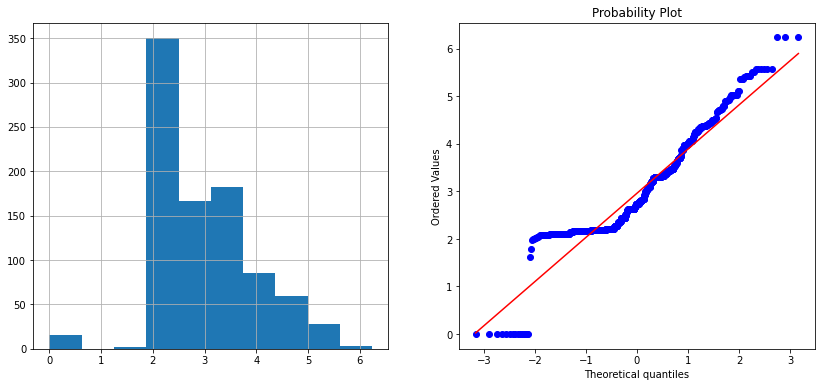

In [77]:
df['Fare_log']=np.log1p(df.Fare)
plot_data(df,'Fare_log')

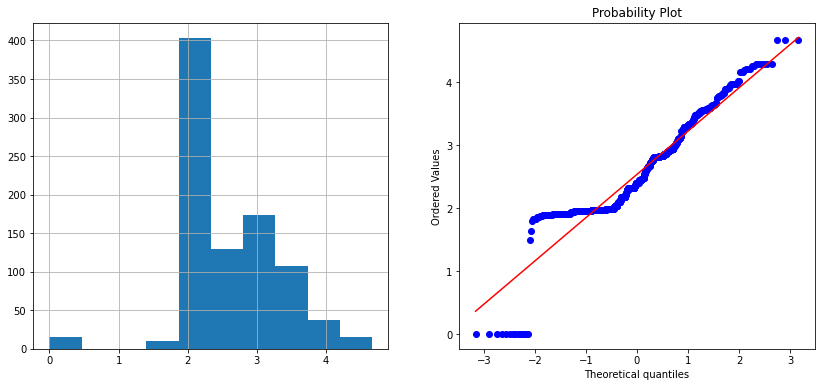

In [81]:
df['Fare_boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_boxcox')


# End Notes
To summarize saw the effects of feature transformation and scaling on our data and when to use which scaler. Also, we noticed that some scalers were sensitive to outliers, while others were robust. We also noticed how some scalers change the underlying distribution of the data itself.

Each feature scaling technique has its own characteristics which we can leverage to improve our model. However, just like other steps in building a predictive model, choosing the right scaler is also a trial and error process, and there is no single best scaler that works every time.

Keeping all these in mind, one have to take up various datasets with different kinds of values and try applying these feature transformation and scaling techniques on them.